In [1]:
# Import Important Libraries
import pandas as pd
import numpy as np

In [2]:
# Read the data
TData = pd.read_csv('C:/Users/user/OneDrive/Desktop/Insaid DATA/Fraud.csv')

In [3]:
TData.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# Getting Description of data
TData.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


##### Cleaning the Data

In [5]:
# Check for null values if any
TData.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Check for legit taransaction and fraud transaction values 
TData['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
# inspecting clear Transaction for legit and fraud transactional Value

legit = len(TData[TData.isFraud == 0])
fraud = len(TData[TData.isFraud == 1])
print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)

legit_transaction_percentage = (legit / (fraud + legit)) * 100
fraud_transaction_percentage = (fraud / (fraud + legit)) * 100
print("Percentage of Legit transactions: {:.4f} %".format(legit_transaction_percentage))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_transaction_percentage))


Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


## Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

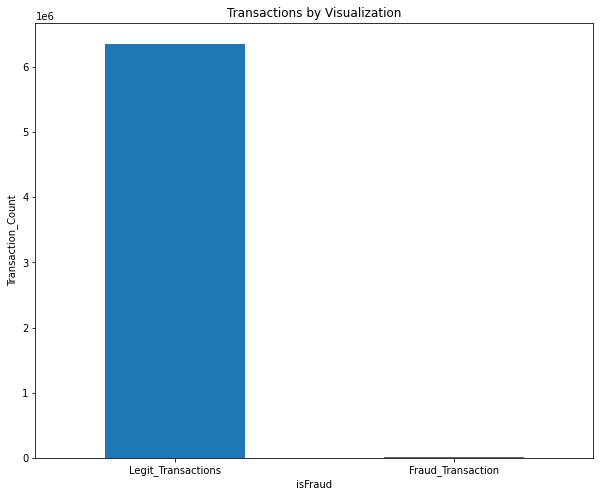

In [8]:
plt.figure(figsize=(10,8))
labels = ["Legit_Transactions", "Fraud_Transaction"]
count_classes = TData.value_counts(TData['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Transactions by Visualization")
plt.ylabel("Transaction_Count")
plt.xticks(range(2), labels)
plt.show()

## Correlation Heatmap

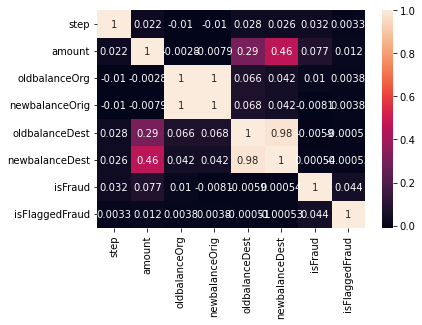

In [9]:
corr_matrix = TData.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Project Analysis

In [10]:
Data1=TData.copy()
Data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
# Checking if there are any attributes with dtype: object
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
# Select columns with 'object' data type
object_list = Data1.select_dtypes(include=['object'])
print(object_list)

             type     nameOrig     nameDest
0         PAYMENT  C1231006815  M1979787155
1         PAYMENT  C1666544295  M2044282225
2        TRANSFER  C1305486145   C553264065
3        CASH_OUT   C840083671    C38997010
4         PAYMENT  C2048537720  M1230701703
...           ...          ...          ...
6362615  CASH_OUT   C786484425   C776919290
6362616  TRANSFER  C1529008245  C1881841831
6362617  CASH_OUT  C1162922333  C1365125890
6362618  TRANSFER  C1685995037  C2080388513
6362619  CASH_OUT  C1280323807   C873221189

[6362620 rows x 3 columns]


# Lable Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
encoder = LabelEncoder()

for i in object_list:
    Data1[i] = encoder.fit_transform(Data1[i].astype(str))

In [14]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


## Multi-Collinearity Factor

In [15]:
# import Vif from Statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(TData):
    # Calculate VIF for each independent variable
    vif_data = pd.DataFrame()
    vif_data['feature'] = TData.columns
    vif_data['VIF'] = [variance_inflation_factor(TData.values, i) for i in range(TData.shape[1])]
    return (vif_data)


# VIF values
calculate_vif(Data1)

,feature,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


* 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest' has vif level is very high and correlated to each other.
*  nameOrig and namedDest are correlated.

In [16]:
# combine the correlated variables to form new data

Data1['Bal_orig'] = Data1.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
Data1['Bal_dest'] = Data1.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
Data1['New_name'] = Data1.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#since new data has been created old column should drop

Data1 = Data1.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
calculate_vif(Data1)

,feature,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Bal_orig,1.307910
5,Bal_dest,3.754335
6,New_name,2.677167


* The new data has been created and vif has been balanced out

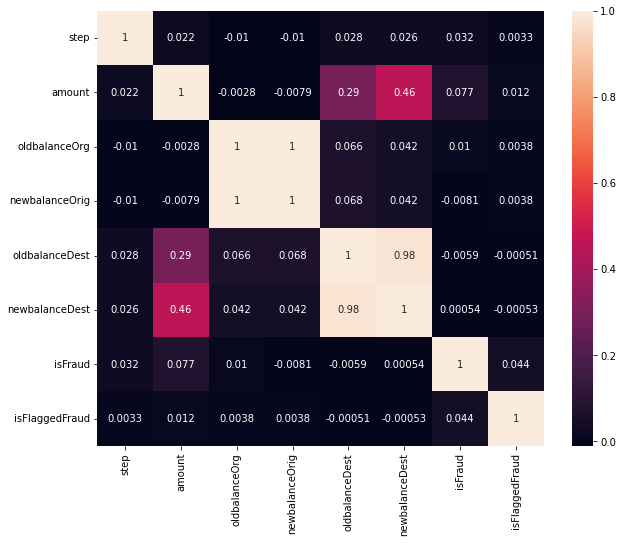

In [17]:
#heatmap of TData(Old Data)

corr=TData.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

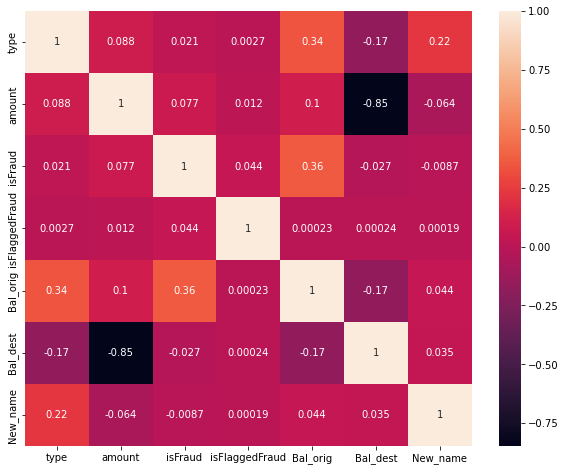

In [18]:
# Heatmap of Data1(New Data)

corr=Data1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

# Model Building

In [19]:
X = Data1.drop(columns='isFraud', axis=1)
Y = Data1['isFraud']

In [22]:
from sklearn.model_selection import train_test_split

# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (4453834, 6)
X_test:  (1908786, 6)


# Model Training
#### model Training using classifier technique as decesion tree, Random Forest, logistic regression

In [23]:
# import libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
# Decision tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

# Logistic Regression Classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

Y_pred_lr = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, Y_test) * 100

# Evaluation

In [26]:
# Evaluating Accuracies of Classifier Techniques

print("Decision Tree Accuracy: ", decision_tree_score)
print("Random Forest Accuracy: ", random_forest_score)
print("Logistic Regression Accuracy: ", logistic_regression_score)

Decision Tree Accuracy:  99.92256858547789
Random Forest Accuracy:  99.95866482675376
Logistic Regression Accuracy:  99.8608539668669


 #### Classification Report

In [27]:
# Decision Tree

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report for Decision Tree:")
print(classification_report_dt)

# Random Forest

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report for Random Forest:")
print(classification_report_rf)

# Logistic Regression

classification_report_lr = classification_report(Y_test, Y_pred_lr)
print("Classification Report for Logistic Regression:")
print(classification_report_lr)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.44      0.37      0.40      2435

    accuracy                           1.00   1908786

F1 score of random forest looks good,logistic regression lacks precesion.

### Confusion Matrix

In [29]:
# confusion matrix - DT
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)


# confusion matrix - RF
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)


# confusion matrix - LR
confusion_matrix_LR = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905592     759]
 [    719    1716]]
Confusion Matrix - Random Forest
[[1906285      66]
 [    723    1712]]
Confusion Matrix - Logistic Regression
[[1906285      66]
 [    723    1712]]


Random forest detected more accurate result than other two models.
f1 score suggests RF is best model as per accuracy as well as precesion.

# Conclusion

We can see the Accuracy of Decision Tree and Random Forest is almost same. Precision is a crucial factor to predict correctly. The Precision for both Decision tree and Random Forest is way better than other. So, both are the best option. The logistic regression, Bagging etc. gives good accuracy but not the precesion we required.

Q2. Describe your fraud detection model in elaboration.

Ans:
1. A fraud detection model is a machine learning model that is trained to predict the probability of fraud in a given transaction or event. To build a fraud detection model, you first need to collect data on past transactions or events, including both fraudulent and non-fraudulent ones
2. The inherently imbalanced nature of the data, as fraudulent transactions are typically much less common than non-fraudulent ones. This can make it difficult for the machine learning model to accurately identify fraudulent transactions.
3. To address this challenge, various techniques can be used such as re-sampling the data to balance the classes, using different performance metrics that are better suited for imbalanced data, or using cost-sensitive learning where the misclassification costs for the fraudulent transactions are higher than for the non-fraudulent transactions.
4. Once the model is trained, it can be used to make predictions on new transactions or events. The model’s predictions can then be used to flag potentially fraudulent transactions for further investigation.


Q3.  How did you select variables to be included in the model?

Ans: Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then identify the vif scores of correlated variables

Q5. What are the key factors that predict fraudulent customer?

1. The source of request is secured or not ?
2. Is the name of organisation asking for money is legit or not ?
3. Transaction history of vendors.

Q6. Do these factors make sense? If yes, How? If not, How not?

These factors can provide valuable insights into a customer’s behavior and help identify patterns or anomalies that may indicate fraudulent activity.

Q7. What kind of prevention should be adopted while company update its infrastructure?

1. Ensuring data security
2. Conducting regular risk assessments
3. Updating your software can involve transferring or migrating sensitive data.
